In [8]:
import numpy as np
from matplotlib import pyplot as plt

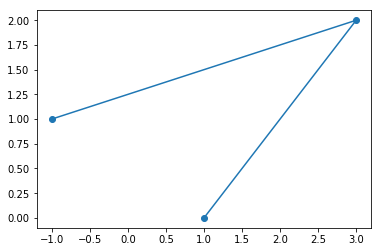

In [5]:
coord1 = [1.0,0.0]
coord2 = [3.0,2.0]
coord3 = [-1.0,1.0]
coordAll = np.array([coord1,coord2,coord3])

natCoord1 = [1.0,0.0,0.0]
natCoord2 = [0.0,1.0,0.0]
natCoord3 = [0.0,0.0,1.0]
natCoordAll = np.array([natCoord1,natCoord2,natCoord3])

plt.plot(coordAll[:,0],coordAll[:,1],'o-')

In [12]:
aMat = np.matrix([[1.0,1.0,1.0],coordAll[:,0],coordAll[:,1]])

detA = np.linalg.det(aMat)
area = detA/2.0
invA = np.linalg.inv(aMat)

detA_slide = (coordAll[1,0]-coordAll[0,0])*(coordAll[2,1]-coordAll[0,1])
detA_slide -= (coordAll[2,0]-coordAll[0,0])*(coordAll[1,1]-coordAll[0,1])
area_slide = detA_slide/2.0
invA_slide = np.matrix([
    [coord2[0]*coord3[1] - coord3[0]*coord2[1], coord2[1]-coord3[1], coord3[0]-coord2[0]],
    [coord3[0]*coord1[1] - coord1[0]*coord3[1], coord3[1]-coord1[1], coord1[0]-coord3[0]],
    [coord1[0]*coord2[1] - coord2[0]*coord1[1], coord1[1]-coord2[1], coord2[0]-coord1[0]]
    ])
invA_slide /= detA

print(detA,detA_slide)
print(area,area_slide)
print(invA)
print(invA_slide)

6.0 6.0
3.0 3.0
[[ 0.83333333  0.16666667 -0.66666667]
 [-0.16666667  0.16666667  0.33333333]
 [ 0.33333333 -0.33333333  0.33333333]]
[[ 0.83333333  0.16666667 -0.66666667]
 [-0.16666667  0.16666667  0.33333333]
 [ 0.33333333 -0.33333333  0.33333333]]


In [ ]:
Nt = [eta1] = [ia00,ia01,ia02]*[1] = [ia00 + ia01*x + ia02*y]
     [eta2]   [ia10,ia11,ia12] [x]   [ia10 + ia11*x + ia12*y]
     [eta3]   [ia20,ia21,ia22] [y]   [ia20 + ia21*x + ia22*y]

B = grad(N) = [dEta1/dx, dEta2/dx, dEta3/dx] = [ia01, ia11, ia21]
              [dEta1/dy, dEta2/dy, dEta3/dy]   [ia02, ia12, ia22]

The derivatives are constant -- >"Constant strain element"
    
K = int(Bt*t*D*B)dA
D = [kxx,kxy]
    [kyx,kyy]

In [23]:
bMat = np.matrix([
    [invA[0,1],invA[1,1],invA[2,1]],
    [invA[0,2],invA[1,2],invA[2,2]]
])

dMat = np.matrix([[4.7,0.0],[0.0,5.1]])
t = 1.3

B: [[ 0.16666667  0.16666667 -0.33333333]
 [-0.66666667  0.33333333  0.33333333]]
B_T: [[ 0.16666667 -0.66666667]
 [ 0.16666667  0.33333333]
 [-0.33333333  0.33333333]]
B_T*t*D: [[ 1.01833333 -4.42      ]
 [ 1.01833333  2.21      ]
 [-2.03666667  2.21      ]]
B_T*t*D*B: [[ 3.11638889 -1.30361111 -1.81277778]
 [-1.30361111  0.90638889  0.39722222]
 [-1.81277778  0.39722222  1.41555556]]


In [20]:
kNoInt = bMat.transpose()*t*dMat*bMat
kMat = kNoInt*area
print(kMat)

kGivenInSlide = np.matrix([
    [9.3992, -3.9108, -5.4383],
    [-3.9108, 2.7192, 1.1917],
    [5.4383, 1.1917, 4.2467]
])

print("\nDiff from slide:\n",kMat-kGivenInSlide)

[[ 9.34916667 -3.91083333 -5.43833333]
 [-3.91083333  2.71916667  1.19166667]
 [-5.43833333  1.19166667  4.24666667]]

Diff fro slide:
 [[-5.00333333e-02 -3.33333333e-05 -3.33333333e-05]
 [-3.33333333e-05 -3.33333333e-05 -3.33333333e-05]
 [-1.08766333e+01 -3.33333333e-05 -3.33333333e-05]]
